###Support Vector Regression Models, (Lineal, Polinomial, RBF)

####Importamos las librerias a usar

In [8]:
import csv
import pandas as pd
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

#Leemos la data desde la misma carpeta
data = pd.read_csv('./MSFT.csv')
data = data.head(20)


#Definimos arrays para 'dfdates' y 'dfprices'
dfdates  = []
dfprices = []


####Funciones para trabajar con nuestra data

In [9]:
#Funcion para trabajar con pandas
def gd(dataframe):
    i = 1.0
    while i < len(dataframe):
        a = dataframe.xs(i)
        #print(a)
        dfdates.append(i)
        #print(dates)
        dfprices.append(a[1])
        i += 1
    return


#Funcion para trabajar localmente con archivos csv
def get_data(filename):
    with open(filename, 'r') as csvfile:
        csvFileReader = csv.reader(csvfile)
        next(csvFileReader)	# skipping column names
        i = 1.0
        for row in csvFileReader:
            csvdates.append(i)
            #print(dates)
            csvprices.append(float(row[1]))
            i += 1
    return

####Función predictora

In [10]:
#Funcion predictora de precios
def predict_prices(dates, prices, x):
    dates = np.reshape(dates,(len(dates), 1)) # converting to matrix of n X 1

    svr_lin = SVR(kernel= 'linear', C= 1e3)
    svr_poly = SVR(kernel= 'poly', C= 1e3, degree= 2)
    svr_rbf = SVR(kernel= 'rbf', C= 1e3, gamma= 0.1) # defining the support vector regression models
    svr_rbf.fit(dates, prices) # fitting the data points in the models
    svr_lin.fit(dates, prices)
    svr_poly.fit(dates, prices)

    plt.scatter(dates, prices, color= 'black', label= 'Data') # plotting the initial datapoints
    plt.plot(dates, svr_rbf.predict(dates), color= 'red', label= 'RBF model') # plotting the line made by the RBF kernel
    plt.plot(dates,svr_lin.predict(dates), color= 'green', label= 'Linear model') # plotting the line made by linear kernel
    plt.plot(dates,svr_poly.predict(dates), color= 'blue', label= 'Polynomial model') # plotting the line made by polynomial kernel
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Support Vector Regression')
    plt.legend()
    plt.show()

    #Retornamos los precios predecidos según la fecha
    return svr_rbf.predict(dates)[0], svr_lin.predict(dates)[0], svr_poly.predict(dates)[0]


####Hacemos la predicción y mostramos los valores finales

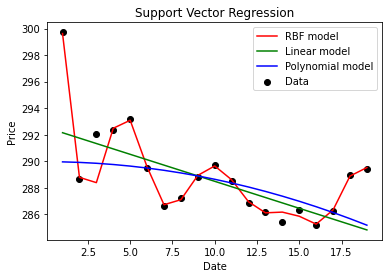

RBF: 299.6197862358488 LIN: 292.1533253333329 POLY: 289.95783078316305


In [11]:
gd(data)

#La lista de precios a la inversa
dfprices.reverse()

#Modelo de entrenamiento

predicted_price = predict_prices(dfdates, dfprices, 20)

#Imprimimos los valores que nos devuelve la función predicitora
print("RBF:", predicted_price[0],"LIN:", predicted_price[1],"POLY:", predicted_price[2])